In [23]:
# To read the csv files in arrays and dataframes.
import numpy as np 
import pandas as pd 

In [24]:
data = pd.read_csv(r"C:\Users\reddy\Desktop\spam.csv", encoding = "latin-1")
# # encoding='latin-1' is used to download all special characters and everything in python. If there is no encoding on the data, it gives an error. Let's check the first five values.
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [26]:
data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
data.rename(columns= { 'v1' : 'class' , 'v2' : 'message'}, inplace= True)
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Visualization 

C:\Users\reddy\AppData\Local\Temp\ipykernel_11988\3974810849.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count =pd.value_counts(data["class"], sort= True)


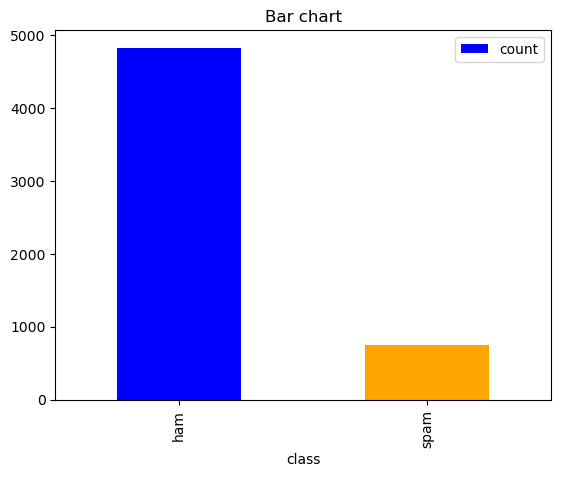

In [28]:
import matplotlib.pyplot as plt
count =pd.value_counts(data["class"], sort= True)
count.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.legend(loc='best')
plt.show()

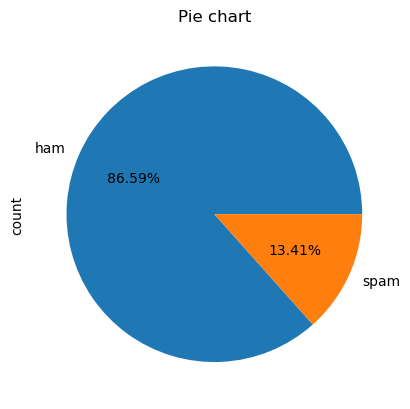

In [29]:
count.plot(kind = 'pie',autopct='%1.2f%%') # 1.2 is the decimal points for 2 places
plt.title('Pie chart')
plt.show()

In [30]:
data.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [31]:
data['length'] = data['message'].apply(len)
# swapping the columns
data = data[['message', 'length', 'class']]
data.head()

,message,length,class
0,"Go until jurong point, crazy.. Available only ...",111,ham
1,Ok lar... Joking wif u oni...,29,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,spam
3,U dun say so early hor... U c already then say...,49,ham
4,"Nah I don't think he goes to usf, he lives aro...",61,ham


# Data Pre-Processing

In [32]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
def clean_message(message):
    message = re.sub("[^A-Za-z]", " ", message) #1
    message = message.lower() #2
    message = message.split() #3
    stemmer = PorterStemmer()   #4. to find the  root meaning word of each word         
    message = [stemmer.stem(word) for word in message if word not in set(stopwords.words("english"))] #5
    message = " ".join(message) #6 #Keeping cleaned words together
    return message

Let's test how our function works. We shall take the original data and the 1st value.

In [33]:
message = data.message[0]
print(message)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


Testing the data after text mining from the actual data given and performing all the operiations on the data.

In [34]:
message = clean_message(message)
print(message)

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


Let us apply the function to all the rows in the data.

In [ ]:
messages = []
for i in range(0, len(data)):
    message = clean_message(data.message[i])
    messages.append(message)

In [ ]:
data = data.drop(["message"],axis=1)
data['messages'] = messages
data.head()

# Feature selection

In [ ]:
#let's seperate the output and documents
y = data["class"].values
x = data["messages"].values

In [ ]:
from sklearn.model_selection import train_test_split
#splitting the data in training and test set
xtrain , xtest , ytrain , ytest = train_test_split(x,y, test_size = 0.3, random_state = 1)
# test size is 0.3 which is 70 : 30
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)


# **TF-IDF ( Term Frequency - Inverse Document Frequency )**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english',max_df=0.5)

#fitting train data and then transforming it to count matrix#fitting 
x_train = vect.fit_transform(xtrain)
#print(x_train)

#transforming the test data into the count matrix initiated for train data
x_test = vect.transform(xtest)

# importing naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

#fitting the model into train data 
nb.fit(x_train,ytrain)

#predicting the model on train and test data
y_pred_test = nb.predict(x_test)
y_pred_train = nb.predict(x_train)

#checking accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred_test)*100)

#Making Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred_test)
print(cm)

# Testing the Model

In [43]:
new_text = pd.Series('WINNER!! As a valued network customer you have been selected to receivea Rs.1,00,000 prize reward! To claim call 0987654321. Claim code KL341. valid 12 hours')
new_text_transform = vect.transform(new_text)

# Dự đoán lớp (spam hoặc ham)
predicted_class = nb.predict(new_text_transform)[0]

# Tính xác suất dự đoán cho từng lớp
predicted_prob = nb.predict_proba(new_text_transform)

# In kết quả dự đoán cùng với độ tin cậy (xác suất)
if predicted_class == 'spam':
    print(f"The email is a [spam] with  {predicted_prob[0][1]*100:.2f}%")
else:
    print(f"The email is  a [ham] with  {predicted_prob[0][0]*100:.2f}%")


The email is a [spam] with  97.58%


In [44]:
new_text = pd.Series(" Hello, how are you?")
new_text_transform = vect.transform(new_text)
# Dự đoán lớp (spam hoặc ham)
predicted_class = nb.predict(new_text_transform)[0]

# Tính xác suất dự đoán cho từng lớp
predicted_prob = nb.predict_proba(new_text_transform)

# In kết quả dự đoán cùng với độ tin cậy (xác suất)
if predicted_class == 'spam':
    print(f"The email is a [spam] with {predicted_prob[0][1]*100:.2f}%")
else:
    print(f"The email is  a [ham] with {predicted_prob[0][0]*100:.2f}%")

The email is  a [ham] with 94.48%
